# Custom Impedance Fitting Function
Borrowing from the PyEIS Library, this page demonstrates how to use the Electrochemical Spectroscopy fitting function

In [1]:
#PyEIS Library#
#from utils.tools import *
from PyEIS import *

In [4]:
#Locate the data, prepare for import of the MPT file

#EXAMPLE
path=r"C:\Users\cjang\Desktop\impedance_data\data\\"
data = ['DE_40_1_30.mpt']
mpt_data = EIS_exp(path,data)

cycle || No. RC-elements ||   u
[1]            2            0.81


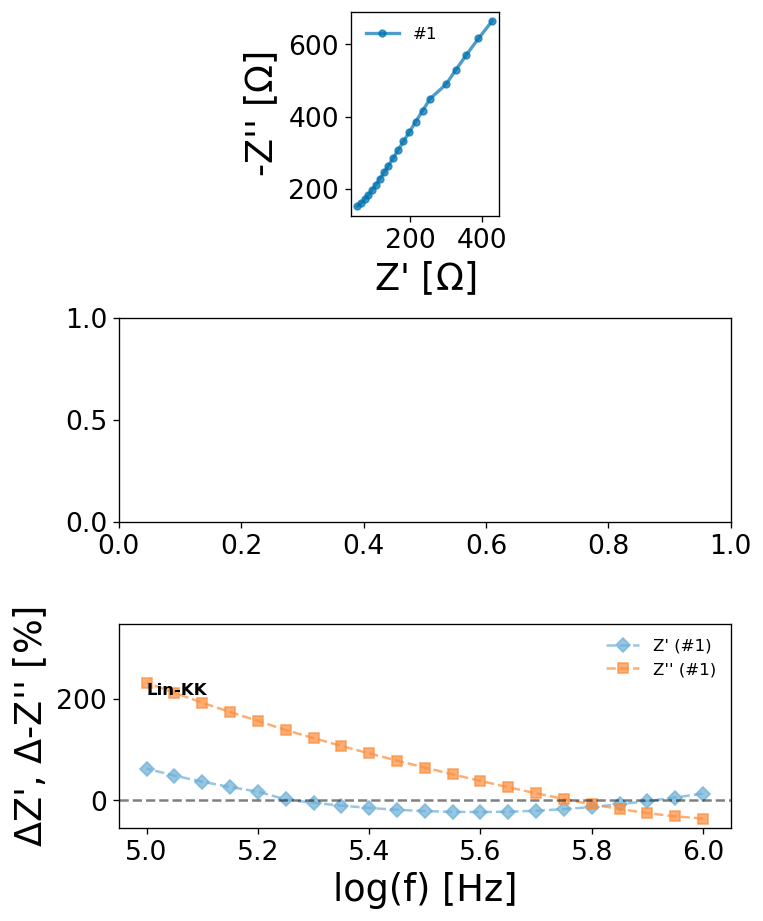

In [5]:
#THIS IS THE LINEAR KRAMER KRONIG ANALYSIS SECTION
#NOT NESSESCARY AT THE MOMENT, BUT THIS WILL HELP ADJUST THE MASK
#WILL HELP PREVENT WITH LONG FITTING PROCESSES

mpt_data.Lin_KK(plot='w_data')

In [ ]:
#USES THE EIS FITTING FUNCTION TO PREDICT THE FREQUENCIES OF THE MPT FILE

#INITIAL ARBITRARY GUESSES
#WILL CREATE A MANUAL FUNCTION THAT CAN ADJUST THE INITIAL GUESSES BUT FOR RIGHT NOW, RUN WITH THESE
Rs_guess = 10

R_guess = 2959
n_guess = 0.8
fs_guess = 23023

R2_guess = 258738
n2_guess = 0.8
fs2_guess = 0.2



#USE THE PARAMETERS DATA STRUCTURE TO WRAP THE INITIAL VALUES
params = Parameters()
params.add('Rs', value=R_guess, min=Rs_guess*.01, max=Rs_guess*100)

params.add('R', value=R_guess, min=R_guess*.1, max=R_guess*10)
params.add('n', value=n_guess, min=.65, max=1.2)
params.add('fs', value=fs_guess, min=10**0.5, max=10**6)
#params.add('Q', value=fs_guess, min=10**0.5, max=10**6)

params.add('R2', value=R2_guess, min=R2_guess*.1, max=R2_guess*10)
params.add('n2', value=n2_guess, min=.65, max=1.2)
params.add('fs2', value=fs2_guess, min=10**-2, max=10**1)
#params.add('Q2', value=fs2_guess, min=10**-2, max=10**2)



#FIT THE PARAMETERS ALONG THE R - RQ - RQ CIRCUIT
#LATER WILL PROVIDE OPTIONS TO BENEFITS AND DETRACTIONS OF THE WEIGHT FUNCTION AFTER FURTHER RESEARCH
#print(mpt_data.df[0].keys())
mpt_data.mpt_fit(params=params, circuit='R-RQ-RQ', weight_func='modulus')
#THIS WILL OUTPUT A SET OF COEFFICIENTS PREDICTED FROM THE FIT

In [ ]:
#PLOTS THE PREDICTIONS
mpt_data.mpt_plot(fitting = 'on')

In [10]:
#FIRST BATCH OF FITTED COEFFICIENTS, PLUG BACK INTO THE GUESS FUNCTION TO GET EVEN BETTER BATCH

print(mpt_data.fit_Rs)
print(mpt_data.fit_R)
print(mpt_data.fit_n)
print(mpt_data.fit_fs)
print(mpt_data.fit_R2)
print(mpt_data.fit_n2)
print(mpt_data.fit_fs2)

[0.33939310882604573]
[838.2107762482949]
[0.9063901752049042]
[26387.067720550822]
[655109.923180833]
[0.6502061292088703]
[1.369205867619109]


In [11]:
guess_package = [mpt_data.fit_Rs[0], mpt_data.fit_R[0], mpt_data.fit_n[0], mpt_data.fit_fs[0], mpt_data.fit_R2[0], mpt_data.fit_n2[0], mpt_data.fit_fs2[0]]
guess_package

[0.33939310882604573,
 838.2107762482949,
 0.9063901752049042,
 26387.067720550822,
 655109.923180833,
 0.6502061292088703,
 1.369205867619109]

In [12]:
#input: A GUESS PACKAGE OF INITIAL VARIABLE COEFFICIENTS TO CALCULATE THRU CIRCUIT EQ
#output: A NEW GUESS PACKAGE THAT RAN THROUGH ONE ITERATION OF THE GUESS FUNCTION, Possibly use output for another iteration
def guess(guess_package):
    
    #SINGLE ITERATION OF THE GUESS PROCESS
    #USE THIS FUNCTION TO GET CLOSER TO THE IDEAL COEFFICIENTS FOR Rs, R, n, fs, R2, n2, fs2
    #REPEAT THIS FUNCTION UNTIL THE THRESHOLD IS ACHEIVED
    
    params = Parameters()
    
    #adding to the parameters package to send to the fitting function
    params.add('Rs', value=guess_package[0], min=guess_package[0]*.01, max=guess_package[0]*100)
    params.add('R', value=guess_package[1], min=guess_package[1]*.1, max=guess_package[1]*10)
    params.add('n', value=guess_package[2], min=.65, max=1.2)
    params.add('fs', value=guess_package[3], min=10**0.5, max=10**6)
    params.add('R2', value=guess_package[4], min=guess_package[4]*.1, max=guess_package[4]*10)
    params.add('n2', value=guess_package[5], min=.65, max=1.2)
    params.add('fs2', value=guess_package[6], min=10**-2, max=10**1)
    
    #Call to the fitting function given by PyEIS
    mpt_data.mpt_fit(params=params, circuit='R-RQ-RQ', weight_func='modulus')
    
    #maybe take a look at the plots,may help for accuracy, don't really need it...
    #mpt_data.EIS_plot(fitting = 'on')
    
    
    #print out the values
    print(mpt_data.fit_Rs)
    print()
    print(mpt_data.fit_R)
    print(mpt_data.fit_n)
    print(mpt_data.fit_fs)
    print()
    print(mpt_data.fit_R2)
    print(mpt_data.fit_n2)
    print(mpt_data.fit_fs2)
    
    #export the new guess package
    guess_package =  ([mpt_data.fit_Rs[0],mpt_data.fit_R[0],mpt_data.fit_n[0],mpt_data.fit_fs[0],mpt_data.fit_R2[0],mpt_data.fit_n2[0],mpt_data.fit_fs2[0]])
    return guess_package

In [13]:
new_guess_package = [i for i in guess(guess_package)]

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 79328
    # data points      = 42
    # variables        = 7
    chi-square         = 1.56105104
    reduced chi-square = 0.04460146
    Akaike info crit   = -124.277032
    Bayesian info crit = -112.113344
[[Variables]]
    Rs:   0.00339393 +/- 5.5025e-04 (16.21%) (init = 0.3393931)
    R:    1142.81720 +/- 38667.6231 (3383.54%) (init = 838.2108)
    n:    0.74462033 +/- 2.15647996 (289.61%) (init = 0.9063902)
    fs:   39405.5474 +/- 707981.143 (1796.65%) (init = 26387.07)
    R2:   1251863.30 +/- 1.7713e+09 (141494.76%) (init = 655109.9)
    n2:   0.79575516 +/- 8.10019864 (1017.93%) (init = 0.6502061)
    fs2:  3.36944940 +/- 5895.79054 (174977.86%) (init = 1.369206)
[[Correlations]] (unreported correlations are < 0.100)
    C(n, n2)   = -1.000
    C(R, fs)   = -1.000
    C(R2, fs2) = -0.999
    C(R, n)    = -0.998
    C(R, n2)   =  0.998
    C(n, fs)   =  0.995
    C(fs, n2)  = -0.995
    C(fs, R2)  = -0.

In [14]:
new_guess_package

[0.003393931088264225,
 1142.8172042843833,
 0.7446203259535705,
 39405.547426281846,
 1251863.3025146888,
 0.7957551618689727,
 3.369449399709677]

In [15]:
guess_package

[0.33939310882604573,
 838.2107762482949,
 0.9063901752049042,
 26387.067720550822,
 655109.923180833,
 0.6502061292088703,
 1.369205867619109]

In [27]:
#THIS VERIFIES WHETHER OR NOT WE'VE ACHEIVED A SATISFACTORY COEFFICIENT PACKAGE
#IF THIS DOESN'T RETURN TRUE, WE RUN THE GUESSER UNTIL IT DOES
def thresh_verif(before, after):
    try:
        total = 0
        for i in range(len(before)):
            total += (before[i] - after[i])
        print(total)    
        return abs(total) <= 5e-10
    except IndexError as e:
        #IF LISTS AREN'T THE SAME LENGTH
        print("Lists are not the same length")
        return

In [28]:
thresh_verif(guess_package, new_guess_package)

-610078.1134911607


False

In [29]:
new_new_guess_package = guess(new_guess_package)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 36
    # data points      = 42
    # variables        = 7
    chi-square         = 1.56066518
    reduced chi-square = 0.04459043
    Akaike info crit   = -124.287415
    Bayesian info crit = -112.123727
[[Variables]]
    Rs:   3.3984e-05 +/- 49.9282892 (146918221.57%) (init = 0.003393931)
    R:    1142.81751 +/- 39408.2334 (3448.34%) (init = 1142.817)
    n:    0.74461995 +/- 2.19945812 (295.38%) (init = 0.7446203)
    fs:   39405.5714 +/- 721062.021 (1829.85%) (init = 39405.55)
    R2:   1251863.74 +/- 1.6808e+09 (134267.17%) (init = 1251863)
    n2:   0.79575514 +/- 8.26226627 (1038.29%) (init = 0.7957552)
    fs2:  3.36945094 +/- 5579.97737 (165604.94%) (init = 3.369449)
[[Correlations]] (unreported correlations are < 0.100)
    C(n, n2)   = -1.000
    C(R, fs)   = -1.000
    C(R2, fs2) = -0.999
    C(R, n2)   =  0.998
    C(R, n)    = -0.998
    C(n, fs)   =  0.996
    C(fs, n2)  = -0.996
    C(fs, R2)  

In [30]:
for i in range(len(new_guess_package)):
    print(new_new_guess_package[i] - new_guess_package[i])

-0.0033599473600061753
0.00031035118672662065
-3.7655248563694954e-07
0.023995271214516833
0.4414325915277004
-2.3919722424992074e-08
1.539187651999896e-06


In [31]:
thresh_verif(new_guess_package, new_new_guess_package)

-0.46237940528438165


False

In [32]:
new_new_new_guess_package = guess(new_new_guess_package)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 24
    # data points      = 42
    # variables        = 7
    chi-square         = 1.56066518
    reduced chi-square = 0.04459043
    Akaike info crit   = -124.287415
    Bayesian info crit = -112.123727
[[Variables]]
    Rs:   3.3984e-05 +/- 6.33282264 (18634867.23%) (init = 3.398373e-05)
    R:    1142.81751 +/- 38590.2557 (3376.76%) (init = 1142.818)
    n:    0.74461995 +/- 2.15293252 (289.13%) (init = 0.7446199)
    fs:   39405.5714 +/- 706596.611 (1793.14%) (init = 39405.57)
    R2:   1251863.74 +/- 1.7489e+09 (139707.67%) (init = 1251864)
    n2:   0.79575514 +/- 8.08586133 (1016.12%) (init = 0.7957551)
    fs2:  3.36945094 +/- 5820.27152 (172736.50%) (init = 3.369451)
[[Correlations]] (unreported correlations are < 0.100)
    C(n, n2)   = -1.000
    C(R, fs)   = -1.000
    C(R2, fs2) = -0.999
    C(R, n)    = -0.998
    C(R, n2)   =  0.998
    C(n, fs)   =  0.995
    C(fs, n2)  = -0.995
    C(fs, R2)  

In [33]:
thresh_verif(new_new_guess_package, new_new_new_guess_package)

2.3260326994454508e-10


True

In [34]:
#ITERATIVE GUESSER
def guesser(Rs_guess,R_guess,n_guess,fs_guess,R2_guess,n2_guess,fs2_guess):
    guess_package = [Rs_guess, R_guess, n_guess, fs_guess, R2_guess, n2_guess, fs2_guess]
    new_guess = guess(guess_package)
    while not thresh_verif(guess_package, new_guess):
        guess_package = new_guess
        new_guess = guess(new_guess)
        print(new_guess)
    return new_guess

In [35]:
#CUMULATION OF THE FUNCTIONS FROM ABOVE

#GUESSES BROUGHT FROM INIT VALUES
Rs_guess = 40

R_guess = 2959
n_guess = 0.8
fs_guess = 23023

R2_guess = 258738
n2_guess = 0.8
fs2_guess = 0.2


#COMPLETE FUNCTION
guesser(Rs_guess,R_guess,n_guess,fs_guess,R2_guess,n2_guess,fs2_guess)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 2648
    # data points      = 42
    # variables        = 7
    chi-square         = 1.60694701
    reduced chi-square = 0.04591277
    Akaike info crit   = -123.060007
    Bayesian info crit = -110.896320
[[Variables]]
    Rs:   0.40000000 +/- 5.39445220 (1348.61%) (init = 40)
    R:    1118.03302 +/- 39236.7213 (3509.44%) (init = 2959)
    n:    0.74534219 +/- 2.26339245 (303.67%) (init = 0.8)
    fs:   40780.6955 +/- 742241.786 (1820.08%) (init = 23023)
    R2:   1568255.87 +/- 2.3271e+09 (148386.81%) (init = 258738)
    n2:   0.80021193 +/- 8.78702777 (1098.09%) (init = 0.8)
    fs2:  2.71466066 +/- 5035.61831 (185497.16%) (init = 0.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(n, n2)   = -1.000
    C(R, fs)   = -0.999
    C(R2, fs2) = -0.999
    C(R, n)    = -0.998
    C(R, n2)   =  0.998
    C(n, fs)   =  0.996
    C(fs, n2)  = -0.996
    C(Rs, R2)  =  0.681
    C(Rs, fs2) = -0.680
    

[4.017935505184424e-05,
 1136.197256267153,
 0.7439962313806638,
 39900.38907341479,
 1554298.9598668164,
 0.7991864257306229,
 2.6866321442206864]

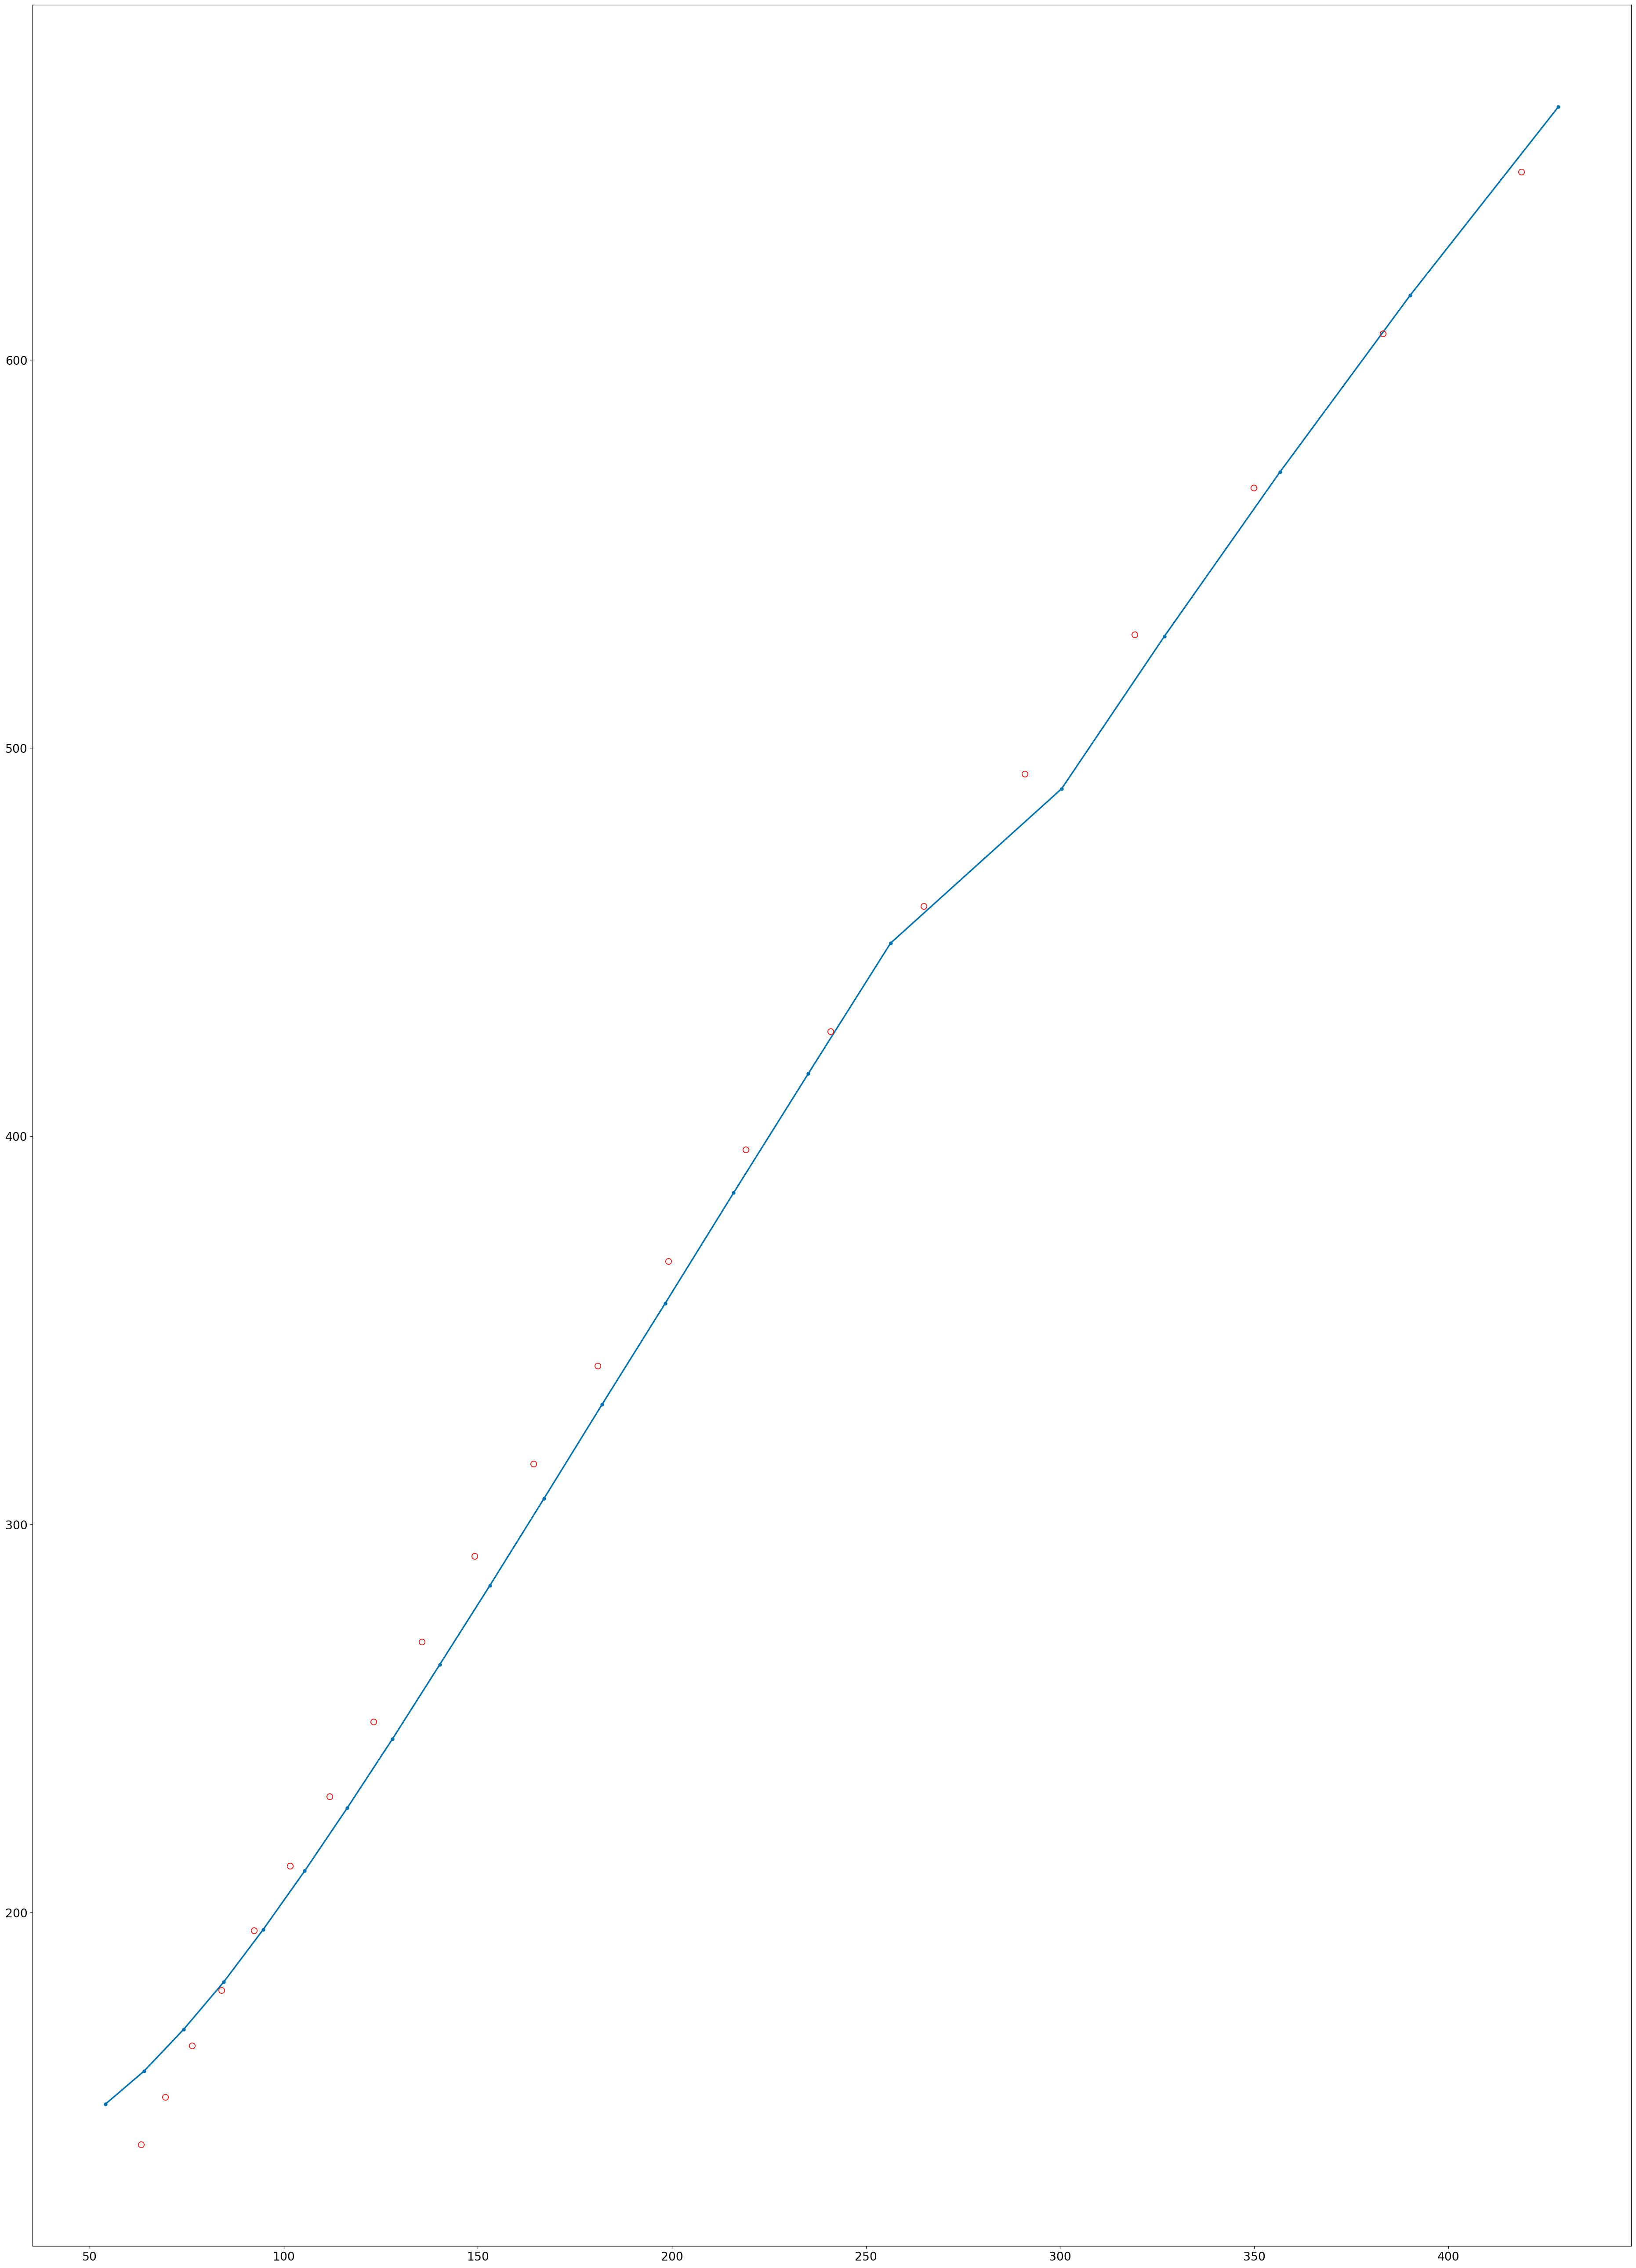

In [36]:
mpt_data.mpt_plot(fitting = 'on')

In [ ]:
im